# Extracción y análisis de datos de comercio electrónico para categorías de cuidado de la piel (Colab version)
Authors: [Daniel David Cangrejo Saenz](https://github.com/DanielCangrejo), [Daniel Mauricio Gutierrez Guzman](https://github.com/DanteGt22/), [Yeison Nicolas Niño Peña](https://github.com/Morktem)


Este cuaderno Jupyter presenta un algoritmo de raspado web basado en Python diseñado para extraer datos de sitios web de comercio electrónico de cuidado de la piel con el fin de analizar tendencias en diferentes categorías de productos. Los datos de lociones, cremas, sueros, limpiadores y protectores solares se obtienen de [mercado libre](www.mercadolibre.com.co). El código proporcionado es totalmente funcional y se ha probado con datos reales. Esta versión está optimizada para ser compatible con Google Colab, lo que garantiza su facilidad de uso y escalabilidad.

_Updated: Nov 24, 2024_


## Install required libraries

In [1]:
!pip install lxml
!pip install scrapy
!pip3 install requests-html
!pip3 install selenium

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.4/44.4 kB 1.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 311.2/311.2 kB 9.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.2/3.2 MB 48.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 259.8/259.8 kB 17.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.9/104.9 kB 6.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 74.6/74.6 kB 5.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.1/50.1 kB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.9/82.9 kB 8.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 201.1/201.1 kB 8.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 144.2/144.2 kB 16.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.4/107.4 kB 10.8 MB/s eta 0:00:00
  Attempting uninstall: websockets
    Found e

In [2]:
%%shell
# Install chromedriver
# Credits: https://medium.com/@MinatoNamikaze02/running-selenium-on-google-colab-a118d10ca5f8
sudo apt -y update
sudo apt install -y wget curl unzip
wget http://archive.ubuntu.com/ubuntu/pool/main/libu/libu2f-host/libu2f-udev_1.1.4-1_all.deb
dpkg -i libu2f-udev_1.1.4-1_all.deb
wget https://dl.google.com/linux/direct/google-chrome-stable_current_amd64.deb
dpkg -i google-chrome-stable_current_amd64.deb

wget -N https://edgedl.me.gvt1.com/edgedl/chrome/chrome-for-testing/120.0.6099.62/linux64/chromedriver-linux64.zip -P /tmp/
unzip -o /tmp/chromedriver-linux64.zip -d /tmp/
chmod +x /tmp/chromedriver-linux64/chromedriver
mv /tmp/chromedriver-linux64/chromedriver /usr/local/bin/chromedriver

pip install selenium chromedriver_autoinstaller

Get:1 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,626 B]
Hit:2 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:3 http://security.ubuntu.com/ubuntu jammy-security InRelease [129 kB]
Get:4 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease [1,581 B]
Get:5 https://r2u.stat.illinois.edu/ubuntu jammy InRelease [6,555 B]
Get:6 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [128 kB]
Hit:7 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Hit:8 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Hit:9 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Get:10 http://archive.ubuntu.com/ubuntu jammy-backports InRelease [127 kB]
Get:11 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  Packages [1,285 kB]
Get:12 https://r2u.stat.illinois.edu/ubuntu jammy/main amd64 Packages [2,648 kB]
Get:13 https://r2u.stat.illinois.edu/ubuntu jamm

### Web Scraping Laptop Sales Data
This section explains the web scraping process implemented to obtain the data from the laptop sales web site [Alkosto](https://www.alkosto.com/).

In [3]:
!pip install undetected_chromedriver

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.4/65.4 kB 2.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for undetected_chromedriver: filename=undetected_chromedriver-3.5.5-py3-none-any.whl size=47048 sha256=f242a9e5010a1799bc4f8ebc747387f9d866b4d173ab0ac44e4584868e9e715e
  Stored in directory: /root/.cache/pip/wheels/5c/b9/03/4b6e38f019d6170e8c25df2e1e362d7bdf9ff4012df2dc85c0
Successfully built undetected_chromedriver


## Import required libraries


---

In [4]:
'''
credits:
https://github.com/googlecolab/colabtools/issues/3347
https://stackoverflow.com/questions/51046454/how-can-we-use-selenium-webdriver-in-colab-research-google-com
Sept 19, 2023
'''

#
!pip3 install chromedriver-autoinstaller

In [5]:
import sys
sys.path.insert(0,'/usr/lib/chromium-browser/chromedriver')

import time
import pandas as pd
from bs4 import BeautifulSoup as bs
from selenium import webdriver
import chromedriver_autoinstaller
import json
import re


## Setup chrome and chrome driver


---



In [6]:
# setup chrome options
chrome_options = webdriver.ChromeOptions()
chrome_options.add_argument('--headless') # ensure GUI is off
chrome_options.add_argument('--no-sandbox')
chrome_options.add_argument('--disable-dev-shm-usage')

# # set path to chromedriver as per your configuration
chromedriver_autoinstaller.install()

'/usr/local/lib/python3.11/dist-packages/chromedriver_autoinstaller/132/chromedriver'


## Section to declare functions

---



### Function scrapebyPages

In [7]:
# Portatiles:
# Portatiles: https://www.alkosto.com/computadores-tablet/c/BI_COMP_ALKOS?page={i}&sort=relevance&q=%3Arelevance%3Acategory%3AComputadores%20Port%C3%A1tiles

def scrapebyPages(min, max):
  #Range of pages from the total search to scrape in.
  #It is recomended to cover a range of one hundred pages in each iteration of this section.
  data = pd.DataFrame()
  for i in range(min,max):

      print(f'************************************')
      print(f'WEB SCRAPING FROM SEARCH PAGE #{i}')
      pag = i
      url = f'https://www.alkosto.com/computadores-tablet/c/BI_COMP_ALKOS?page={i}&sort=relevance&q=%3Arelevance%3Acategory%3AComputadores%20Port%C3%A1tiles'
      print(url)

      driver = webdriver.Chrome(options=chrome_options)
      driver.get(url)
      driver.implicitly_wait(1000)
      html = driver.page_source
      soup = bs(html,'lxml')

      #Get href
      links = gethref(soup)

      p = []
      #Scraping
      for i in range(0,len(links)):
          print('Scrapping', i, '/', len(links), '...')
          p.append(scrapper(links[i]))
          print(f'Este es el valor de p[i]: {p[i]}')

      # append list to DataFrame
      temp_df = pd.DataFrame(p)
      data = pd.concat([data, temp_df], ignore_index=True)

  #Close the web browser tab
  driver.close()

  # quit the driver
  driver.quit()

  return data

### Function gethref para 1 dato


In [8]:
#Function to get 'href' from each article item
def gethref(soup):
    base = 'https://www.alkosto.com'
    links = []
    a_test = soup.find('a', {'class': 'js-view-details'})
    if a_test:
      url_item = a_test.get('href')
      if url_item:
        url_item = base + url_item  #Añadir la base de la Url
        print(url_item)
        links.append(url_item)

    print("Href obtained: ", len(links))

    return links
    # return

### Function gethref para varios datos


In [9]:
def gethref(soup):
    base = 'https://www.alkosto.com'
    links = []
    for link in soup.findAll('a', class_='js-view-details js-algolia-product-click'):
      url_item = link.get('href')
      if url_item:
        url_item = base + url_item #Añadir la base de la Url
        print(url_item)
        links.append(url_item)

    print("Href obtained: ", len(links))

    return links

### Function scrapper

In [10]:
#Function to call housing_features routine on each href
def scrapper(url_item):

    # set up the webdriver
    driver = webdriver.Chrome(options=chrome_options)

    # Scrape
    driver.get(url_item)
    driver.implicitly_wait(10)
    html=driver.page_source

    #Obtaining the html from the web page after applying Selenium
    soup = bs(html,'lxml')

    #Create a list to store info obtained from one particular property
    features = []

    #Applying function to obtain variables defined from one particular property
    features = extract_product_features(soup)

    #Close the web browser tab
    driver.close()

    # quit the driver
    driver.quit()

    return(features)

### Function to extract product features

In [11]:
from pickle import FALSE
# Version 1.0
def extract_product_features(soup):

  features_list = []
# ------------------------------------------------------ NOMBRE -------------------------------------------------------------
  try:
    product_name_div = soup.find('div', class_='new-container__header__title') #Obtenemos el div que tiene el título h1 por la clase
    if product_name_div:
      product_name_h1 = product_name_div.find('h1') #Hallamos el h1 del título
      if product_name_h1:
        product_name = product_name_h1.text #Obtenemos el texto del h1
        product_name = product_name.replace(",","")
      else:
        product_name = ' '
    else:
      product_name = ' '
    features_list.append(product_name)
  except:
    product_name = ' '
    features_list.append(product_name)

# ------------------------------------------------------ PRECIO ANTES ---------------------------------------------------------------
  try:
    price_span = soup.find('span', {'class': 'before-price__basePrice'})
    if price_span:
      price_before = price_span.text.strip()
      price_before = price_before.replace('.', '').replace('$','')
      price_before = int(price_before)
    else:
      price_before = 0
    features_list.append(price_before)
  except:
    price_before = 0
    features_list.append(price_before)


# ------------------------------------------------------ PRECIO DESPUES ---------------------------------------------------------------
  try:
    price_span = soup.find('span', {'class': 'col-xs-12 font-title font-title--product-price reset-padding__left reset-padding__right price-alkosto'})
    if price_span:
      price_after = price_span.text.strip('Hoy')
      price_after = price_after.replace('.', '').replace('$','')
      price_after = int(price_after)
    else:
      print('No encontré span')
      price_after = 0
    features_list.append(price_after)
  except:
    price_after = 0
    features_list.append(price_after)

# --------------------------------------------------- DESCUENTO ----------------------------------------------------------
  discount = 0
  try:
    #Obtenemos el precio anterior
    price_span = soup.find('span', {'class': 'before-price__basePrice'})
    if price_span:
      price_before = price_span.text.strip()
      price_before = price_before.replace('.', '').replace('$','')
      price_before = int(price_before)
    else:
      price_before = 0

    #Obtenemos el precio posterior
    price_span = soup.find('span', {'class': 'col-xs-12 font-title font-title--product-price reset-padding__left reset-padding__right price-alkosto'})
    if price_span:
      price_after = price_span.text.strip('Hoy')
      price_after = price_after.replace('.', '').replace('$','')
      price_after = int(price_after)
    else:
      price_after = 0

    # Si los valores existen entonces calculamos el porcentaje
    if price_before != 0 and price_after != 0:
      discount = ((price_before - price_after) / price_before) * 100
      discount = round(discount, 2)
    else:
      discount = 0

    features_list.append(discount)
  except:
    discount = 0
    features_list.append(discount)

# --------------------------------------------- PUNTUACIÓN REVIWS --------------------------------------------------
  try:
    review_rating_div = soup.find('div',{'class': 'yotpo-sr-bottom-line-left-panel yotpo-sr-bottom-line-score'})
    if review_rating_div:
      review_rating = review_rating_div.text
      review_rating = float(review_rating)
    else:
      #print('No encontré div')
      review_rating = 0

    features_list.append(review_rating)
  except:
    review_rating = 0
    features_list.append(review_rating)

# ----------------------------------------  CANTIDAD REVIEWS ---------------------------------------------------------
  try:
    review_amount_div = soup.find('div',{'class': 'yotpo-bottom-line-basic-text'})
    if review_amount_div:
      review_amount_text = review_amount_div.text
      if 'Basado en' in review_amount_text:
        review_amount_text = review_amount_text.split('Basado en')[1].strip() #Quitamos el Basado en
        review_amount_text = review_amount_text.split('opiniones')[0].strip() #Quitamos el opioniones y dejamos solo el numero
        review_amount = int(review_amount_text)
      else:
        review_amount = 0
    else:
      review_amount = 0

    features_list.append(review_amount)
  except:
    review_amount = 0
    features_list.append(review_amount)

  # ----------------------------------------------------  MARCA ---------------------------------------------------------------
  try:
    script = soup.find("script", {'type': 'application/ld+json'})
    if script:

      script_text = json.loads(script.string)

      # json keys for color and fuel type
      brand = script_text.get('brand', {}).get('name','Brand not found')

      # Append results
      features_list.extend([brand])
    else:
      print("JavaScript script was not found on the page.")
      features_list.extend('')
  except json.JSONDecodeError as e:
      print("Error decoding JSON:", str(e))
      features_list.extend('')
  except Exception as e:
      print("An unexpected error occurred:", str(e))
      features_list.extend('')

  # ----------------------------------------------  MEMORIA RAM ----------------------------------------------------------
  try:
      #Obtener todos los divs de la misma clase de la sección de características
      ram_divs = soup.find_all('div', class_='new-container__table__classifications___type__item')

      # Revisar los divs de la misma clase
      found_ram = False
      for ram_div in ram_divs:
          #Encontrar el texto del div donde esté 'Memoria RAM'
          sub_ram_div = ram_div.find('div', class_='new-container__table__classifications___type__item_feature')
          if sub_ram_div and 'Memoria RAM' in sub_ram_div.text:
              # Si lo encontramos, obtener el valor en el siguiente div
              ram = ram_div.find('div', class_='new-container__table__classifications___type__item_result')
              if ram:
                  # print(f'ram text {ram.text}')
                  ram = ram.text.replace('GB', '').strip()
                  ram = int(ram)
                  features_list.append(ram)
                  found_ram = True
                  break
      if not found_ram:
        ram = 0
        features_list.append(ram)

  except Exception as e:
      print("An unexpected error occurred:", str(e))
      features_list.append('Error')

  # ----------------------------------------------  DISCO DURO -------------------------------------------------------------
  try:
      #Obtener todos los divs de la misma clase de la sección de características
      disk_divs = soup.find_all('div', class_='new-container__table__classifications___type__item')

      # Revisar los divs de la misma clase
      found_disk = False
      for disk_div in disk_divs:
          #Encontrar el texto del div donde esté 'Memoria RAM'
          sub_disk_div = disk_div.find('div', class_='new-container__table__classifications___type__item_feature')
          if sub_disk_div and 'Capacidad de Disco' in sub_disk_div.text:
              # Si lo encontramos, obtener el valor en el siguiente div
              disk = disk_div.find('div', class_='new-container__table__classifications___type__item_result')
              if disk:
                  #print(f'disk text {disk.text}')
                  if 'TB' in disk.text:
                    disk = re.sub(r'\D', '', disk.text) #Obtenemos solo el valor númerico
                    disk = int(disk)
                    disk = disk * 1024 # Cambiamos los TB a GB
                  elif 'GB' in disk.text:
                    disk = re.sub(r'\D', '', disk.text) #Obtenemos solo el valor númerico
                    disk = int(disk)
                  else:
                    disk = 0
                  features_list.append(disk)
                  found_disk = True
                  break
      if not found_disk:
        disk = 0
        features_list.append(disk)

  except Exception as e:
      print("An unexpected error occurred:", str(e))
      features_list.append('Error')

# ----------------------------------------------  PROCESADOR -------------------------------------------------------------
  try:
      #Obtener todos los divs de la misma clase de la sección de características
      processor_divs = soup.find_all('div', class_='new-container__table__classifications___type__item')

      # Revisar los divs de la misma clase
      found_processor = False
      for processor_div in processor_divs:
          #Encontrar el texto del div donde esté 'Memoria RAM'
          sub_processor_div = processor_div.find('div', class_='new-container__table__classifications___type__item_feature')
          if sub_processor_div and 'Procesador' in sub_processor_div.text:
              # Si lo encontramos, obtener el valor en el siguiente div
              processor = processor_div.find('div', class_='new-container__table__classifications___type__item_result')
              if processor:
                  #print(f'processor text {processor.text}')
                  processor = processor.text
                  features_list.append(processor)
                  found_processor = True
                  break
      if not found_processor:
        processor = 0
        features_list.append(processor)

  except Exception as e:
      print("An unexpected error occurred:", str(e))
      features_list.append('Error')

  return features_list

## Start scraping

---

In [12]:
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from selenium.webdriver.common.by import By

In [ ]:
"""
 The input parameters for the 'scrapebyPages' function are: Brand name, Car model
 name. Be careful to write the brand and model names exactly as they are in tucarro.com.
 The third input parameter is the initial results page (always initialize to 1)
 and the fourth input parameter is the final results page you want to download data from;
 this parameter depends on the amount of results pages your car returns
 for the brand and model you want to get data from. So, it is recommended to search
 the web portal first to find out how many pages of results you can get
 for the car you want to get data from.
"""

data = scrapebyPages(1,7)

************************************
WEB SCRAPING FROM SEARCH PAGE #1
https://www.alkosto.com/computadores-tablet/c/BI_COMP_ALKOS?page=1&sort=relevance&q=%3Arelevance%3Acategory%3AComputadores%20Port%C3%A1tiles
Href obtained:  0
************************************
WEB SCRAPING FROM SEARCH PAGE #2
https://www.alkosto.com/computadores-tablet/c/BI_COMP_ALKOS?page=2&sort=relevance&q=%3Arelevance%3Acategory%3AComputadores%20Port%C3%A1tiles
https://www.alkosto.com/computador-portatil-hp-14-pulgadas-dq0532la-intel-celeron/p/198122844265
https://www.alkosto.com/computador-portatil-gamer-hp-victus-156-pulgadas-fa0022la/p/198122718252
https://www.alkosto.com/computador-portatil-asus-vivobook-156-pulgadas-x1504za/p/4711387480755
https://www.alkosto.com/computador-portatil-lenovo-ideapad-1-156-pulgadas-15amn7/p/196803261844
https://www.alkosto.com/computador-portatil-gamer-acer-nitro-156-pulgadas-5029/p/4711474139276
https://www.alkosto.com/computador-portatil-hp-156-pulgadas-fc0043la-amd-ryzen-3

In [31]:
cols = ['product_name','price_before','price_after','discount','review_rating','review_amount','brand','ram', 'disk', 'processor']
data.columns = cols
print(data.shape)
data.tail(52)

(75, 10)


,product_name,price_before,price_after,discount,review_rating,review_amount,brand,ram,disk,processor
23,Computador Portátil 2 en 1 ACER ASPIRE SPIN 14...,4199000,2489000,40.72,0.0,0,ACER,8,512,Intel Core I3
24,Computador Portátil 2 en 1 LENOVO Ideapad 5 - ...,4799000,3799000,20.84,5.0,9,LENOVO,16,512,AMD R7
25,"Computador Portátil LENOVO IdeaPad Slim 3 14"" ...",2399000,1599000,33.35,5.0,4,LENOVO,8,512,AMD R3
26,Computador Portátil Gamer ASUS TUF Gaming 15.6...,5099000,3649000,28.44,4.9,15,ASUS,8,512,AMD R7
27,"Computador Portátil HP Pavilion 13.3"" Pulgadas...",7799000,4899000,37.18,5.0,1,HP,16,1024,AMD R7
28,"Computador Portátil Gamer LENOVO LOQ 15.6"" Pul...",5999000,4699000,21.67,4.9,16,LENOVO,24,512,Intel Core I5
29,"Computador Portátil Gamer ASUS TUF 15.6"" Pulga...",5399000,3299000,38.90,4.9,13,ASUS,8,1024,AMD R5
30,"Computador Portátil ACER ASPIRE 5 15.6"" Pulgad...",5299000,3249000,38.69,5.0,3,ACER,8,512,Intel Core I5
31,Computador Portátil 2 en 1 LENOVO Ideapad 5 - ...,4459000,3399000,23.77,4.5,2,LENOVO,16,512,AMD R5
32,"Computador Portátil ACER ASPIRE 3 15.6"" Pulgad...",3299000,1999000,39.41,5.0,1,ACER,8,512,AMD R5


### Procesamiento y Limpieza de datos

In [32]:
# Cambiar valores tipos correctos.
data['price_before'] = data['price_before'].astype(int)
data['price_after'] = data['price_after'].astype(int)
data['discount'] = data['discount'].astype(float)
data['product_name'] = data['product_name'].astype(str)
data['brand'] = data['brand'].astype(str)
data['brand'] = data['brand'].str.strip().str.upper()
data['processor'] = data['processor'].astype(str)

data.dtypes


,0
product_name,object
price_before,int64
price_after,int64
discount,float64
review_rating,float64
review_amount,int64
brand,object
ram,int64
disk,int64
processor,object


In [33]:
# Quitar elementos que no sean computadores portátiles.
data = data[data['product_name'].str.contains('MacBook|Macbook|Computador Portátil|Computador Portatil', case=False)]



In [34]:
print(data.shape)
data.tail(52)

(75, 10)


,product_name,price_before,price_after,discount,review_rating,review_amount,brand,ram,disk,processor
23,Computador Portátil 2 en 1 ACER ASPIRE SPIN 14...,4199000,2489000,40.72,0.0,0,ACER,8,512,Intel Core I3
24,Computador Portátil 2 en 1 LENOVO Ideapad 5 - ...,4799000,3799000,20.84,5.0,9,LENOVO,16,512,AMD R7
25,"Computador Portátil LENOVO IdeaPad Slim 3 14"" ...",2399000,1599000,33.35,5.0,4,LENOVO,8,512,AMD R3
26,Computador Portátil Gamer ASUS TUF Gaming 15.6...,5099000,3649000,28.44,4.9,15,ASUS,8,512,AMD R7
27,"Computador Portátil HP Pavilion 13.3"" Pulgadas...",7799000,4899000,37.18,5.0,1,HP,16,1024,AMD R7
28,"Computador Portátil Gamer LENOVO LOQ 15.6"" Pul...",5999000,4699000,21.67,4.9,16,LENOVO,24,512,Intel Core I5
29,"Computador Portátil Gamer ASUS TUF 15.6"" Pulga...",5399000,3299000,38.90,4.9,13,ASUS,8,1024,AMD R5
30,"Computador Portátil ACER ASPIRE 5 15.6"" Pulgad...",5299000,3249000,38.69,5.0,3,ACER,8,512,Intel Core I5
31,Computador Portátil 2 en 1 LENOVO Ideapad 5 - ...,4459000,3399000,23.77,4.5,2,LENOVO,16,512,AMD R5
32,"Computador Portátil ACER ASPIRE 3 15.6"" Pulgad...",3299000,1999000,39.41,5.0,1,ACER,8,512,AMD R5


In [35]:
saved_name=f'scraping_pcs_page.csv'
data.to_csv(saved_name, encoding='utf-8', index=False)

## Gráficas


In [36]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
%matplotlib inline

In [37]:
data = pd.read_csv('scraping_pcs_page.csv')

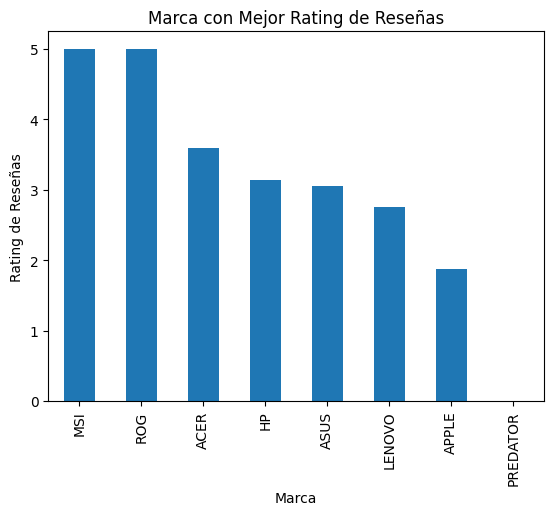

In [38]:
brand_ratings = data.groupby('brand')['review_rating'].mean().sort_values(ascending=False)
brand_ratings.plot(kind='bar', title='Marca con Mejor Rating de Reseñas')
plt.xlabel('Marca')
plt.ylabel('Rating de Reseñas')
plt.show()

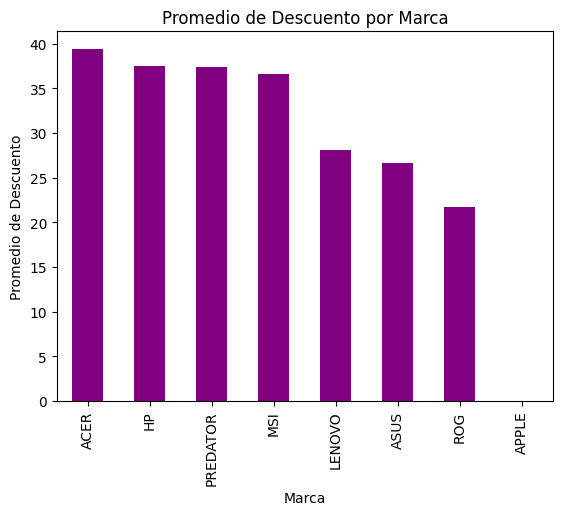

In [39]:
avg_discount_by_brand = data.groupby('brand')['discount'].mean().sort_values(ascending=False)
avg_discount_by_brand.plot(kind='bar', title='Promedio de Descuento por Marca', color='purple')
plt.xlabel('Marca')
plt.ylabel('Promedio de Descuento')
plt.show()

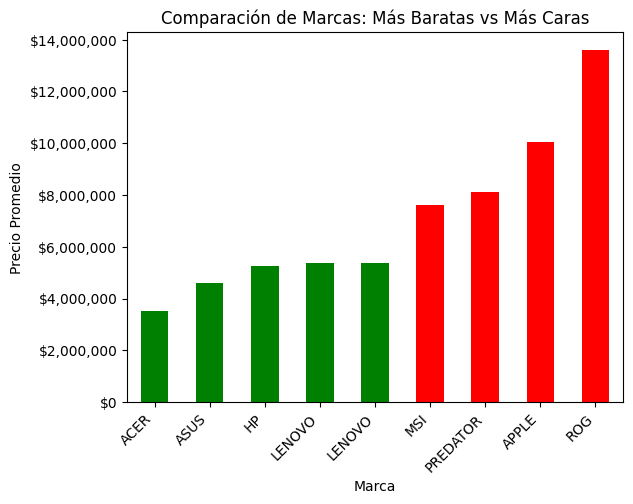

In [40]:
# Agrupar por marca y obtener el precio promedio
brand_prices = data.groupby('brand')['price_after'].mean().sort_values()

# Seleccionar las 4 marcas más baratas y las 5 más caras
top_cheap = brand_prices.head(4)
top_expensive = brand_prices.tail(5)

# Concatenar los resultados para tener una sola serie con ambas categorías
top_brands = pd.concat([top_cheap, top_expensive])

# Graficar
top_brands.plot(kind='bar', color=['green']*5 + ['red']*5, title='Comparación de Marcas: Más Baratas vs Más Caras')

# Añadir etiquetas y títulos
plt.xlabel('Marca')
plt.ylabel('Precio Promedio')
plt.xticks(rotation=45, ha='right')  # Rotar etiquetas en el eje X para que se vean bien

# Configurar el formato del eje Y para mostrar los valores en formato normal
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'${x:,.0f}'))

# Mostrar la gráfica
plt.show()


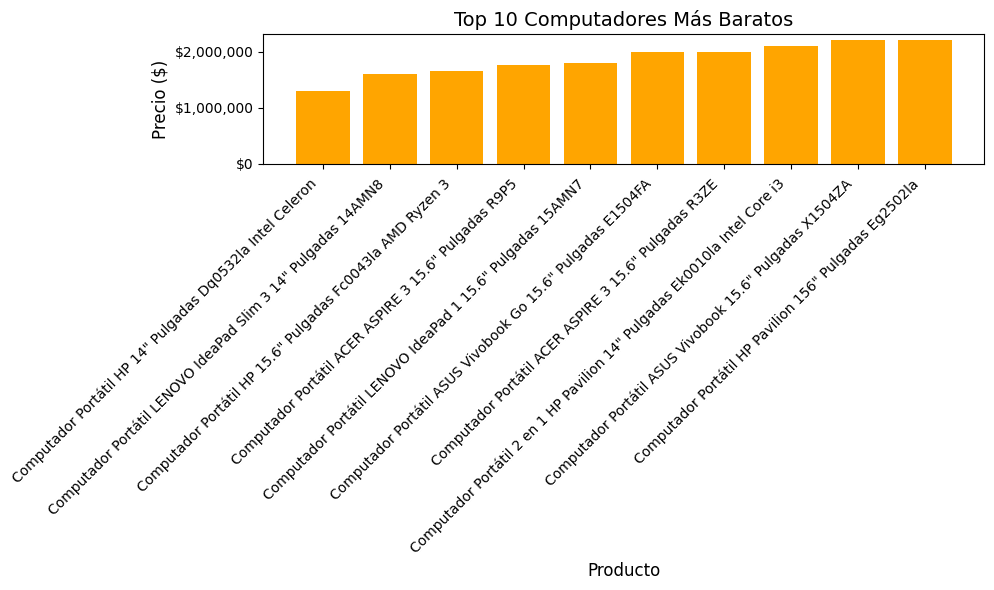

In [41]:
# Ordenar los datos por precio y seleccionar los 10 más baratos
top_cheap_computers = data.sort_values(by='price_after').head(10)

top_cheap_computers['short_name'] = top_cheap_computers['product_name'].str.split("-").str[0]

# Crear la gráfica de barras
plt.figure(figsize=(10, 6))
plt.bar(top_cheap_computers['short_name'], top_cheap_computers['price_after'], color='orange')

# Añadir títulos y etiquetas
plt.title('Top 10 Computadores Más Baratos', fontsize=14)
plt.xlabel('Producto', fontsize=12)
plt.ylabel('Precio ($)', fontsize=12)

# Rotar las etiquetas del eje X para que se vean mejor
plt.xticks(rotation=45, ha='right', fontsize=10)

# Formatear el eje Y para mostrar los precios en formato monetario
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'${x:,.0f}'))

# Ajustar el diseño y mostrar la gráfica
plt.tight_layout()
plt.show()

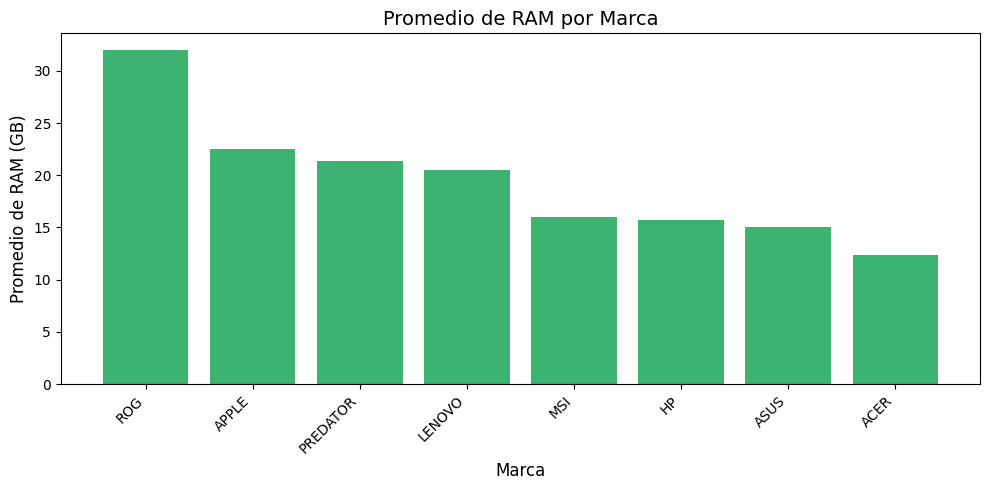

In [42]:
# Calcular el promedio de RAM por marca
avg_ram_by_brand = data.groupby('brand')['ram'].mean().sort_values(ascending=False)

# Crear la gráfica de barras
plt.figure(figsize=(10, 5))
plt.bar(avg_ram_by_brand.index, avg_ram_by_brand.values, color='mediumseagreen')

# Añadir títulos y etiquetas
plt.title('Promedio de RAM por Marca', fontsize=14)
plt.xlabel('Marca', fontsize=12)
plt.ylabel('Promedio de RAM (GB)', fontsize=12)

# Rotar las etiquetas del eje X para mayor claridad
plt.xticks(rotation=45, ha='right', fontsize=10)

# Ajustar el diseño y mostrar la gráfica
plt.tight_layout()
plt.show()

25    Computador Portátil LENOVO IdeaPad Slim 3 14" ...
Name: product_name, dtype: object


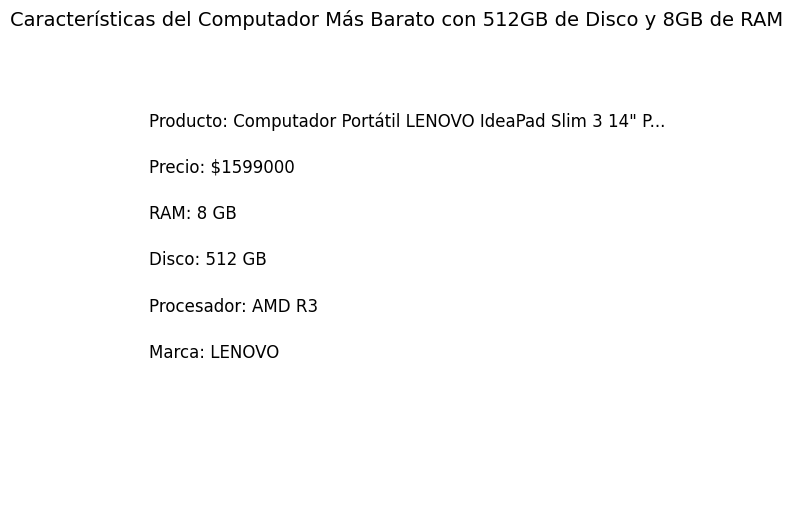

In [44]:
# Filtrar los datos para cumplir con las condiciones
filtered_data = data[(data['disk'] == 512) & (data['ram'] == 8)]

# Ordenar por precio y obtener el más barato
cheapest_computer = filtered_data.sort_values(by='price_after').head(1)

# Crear una figura en blanco
plt.figure(figsize=(8, 6))

print(cheapest_computer['product_name'])


# Agregar texto con las características del computador
plt.text(0.1, 0.8, f"Producto: {cheapest_computer['product_name'].to_string(index=False)}", fontsize=12)
plt.text(0.1, 0.7, f"Precio: ${cheapest_computer['price_after'].to_string(index=False)}", fontsize=12)
plt.text(0.1, 0.6, f"RAM: {cheapest_computer['ram'].to_string(index=False)} GB", fontsize=12)
plt.text(0.1, 0.5, f"Disco: {cheapest_computer['disk'].to_string(index=False)} GB", fontsize=12)
plt.text(0.1, 0.4, f"Procesador: {cheapest_computer['processor'].to_string(index=False)}", fontsize=12)
plt.text(0.1, 0.3, f"Marca: {cheapest_computer['brand'].to_string(index=False)}", fontsize=12)

# Quitar los ejes (porque no los necesitamos)
plt.axis('off')

# Título de la gráfica
plt.title('Características del Computador Más Barato con 512GB de Disco y 8GB de RAM', fontsize=14)

# Mostrar la gráfica
plt.show()

## FastAPI

In [ ]:
!pip install fastapi uvicorn pyngrok matplotlib pandas

In [ ]:
import threading
import time

import pandas as pd
import matplotlib
matplotlib.use('Agg')  # For non-interactive (server-side) rendering
import matplotlib.pyplot as plt
import io, base64

from fastapi import FastAPI
from fastapi.responses import HTMLResponse
from pyngrok import ngrok
import uvicorn

In [45]:
NGROK_AUTH_TOKEN = "2rjairODSeUFgHfW0iVvH1BLyXB_3WBri8h6bLkRUPF5ZUHxw"
ngrok.set_auth_token(NGROK_AUTH_TOKEN)

In [47]:
# Create FastAPI application
app = FastAPI()

# Helper: Convert figure to base64
def fig_to_base64(fig):
    buf = io.BytesIO()
    fig.savefig(buf, format='png', bbox_inches='tight')
    buf.seek(0)
    plot_data = base64.b64encode(buf.getvalue()).decode('utf-8')
    return f"data:image/png;base64,{plot_data}"

# FastAPI route: dashboard with 6 plots
@app.get("/", response_class=HTMLResponse)
def dashboard():
    df = data

    # List to hold base64 <img> strings
    img_tags = []

    ### Plot 1: Promedio de Reseñas por marca
    brand_ratings = df.groupby('brand')['review_rating'].mean().sort_values(ascending=False)
    fig1, ax1 = plt.subplots()
    brand_ratings.plot(kind='bar', ax=ax1)
    ax1.set_ylabel('Rating de Reseñas')
    img_tags.append(fig_to_base64(fig1))
    plt.close(fig1)


    ### Plot 2: Promedio de Descuento por Marca
    avg_discount_by_brand = df.groupby('brand')['discount'].mean().sort_values(ascending=False)
    fig2, ax2 = plt.subplots()
    avg_discount_by_brand.plot(kind='bar', ax=ax2, color='purple')
    ax2.set_xlabel('Marca')
    ax2.set_ylabel('Promedio de Descuento')
    img_tags.append(fig_to_base64(fig2))
    plt.close(fig2)

    ### Plot 3: Comparación de Marcas: Más Baratas vs Más Caras
    brand_prices = df.groupby('brand')['price_after'].mean().sort_values()
    top_cheap = brand_prices.head(4)
    top_expensive = brand_prices.tail(5)
    top_brands = pd.concat([top_cheap, top_expensive])
    fig3, ax3 = plt.subplots()
    top_brands.plot(kind='bar', ax=ax3, color=['green']*5 + ['red']*4)
    ax3.set_xlabel('Marca')
    ax3.set_ylabel('Precio Promedio')
    ax3.set_xticklabels(top_brands.index, rotation=45, ha='right')
    ax3.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'${x:,.0f}'))
    img_tags.append(fig_to_base64(fig3))
    plt.close(fig3)

    ### Plot 4: Top 10 computadores más baratos
    top_cheap_computers = df.sort_values(by='price_after').head(10)
    top_cheap_computers['short_name'] = top_cheap_computers['product_name'].str.split("-").str[0]
    fig4, ax4 = plt.subplots(figsize=(10, 6))
    ax4.bar(top_cheap_computers['short_name'], top_cheap_computers['price_after'], color='orange')
    ax4.set_xlabel('Producto', fontsize=12)
    ax4.set_ylabel('Precio ($)', fontsize=12)
    ax4.set_xticklabels(top_cheap_computers['short_name'], rotation=45, ha='right', fontsize=10)
    ax4.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'${x:,.0f}'))
    plt.tight_layout()
    img_tags.append(fig_to_base64(fig4))
    plt.close(fig4)


    ### Plot 5: Promedio de RAM por Marca
    avg_ram_by_brand = df.groupby('brand')['ram'].mean().sort_values(ascending=False)
    fig5, ax5 = plt.subplots(figsize=(10, 6))
    ax5.bar(avg_ram_by_brand.index, avg_ram_by_brand.values, color='mediumseagreen')
    ax5.set_xlabel('Marca', fontsize=12)
    ax5.set_ylabel('Promedio de RAM (GB)', fontsize=12)
    ax5.set_xticklabels(avg_ram_by_brand.index, rotation=45, ha='right', fontsize=10)
    plt.tight_layout()
    img_tags.append(fig_to_base64(fig5))
    plt.close(fig5)

    ### Plot 6: Características computador más barato con 512gb de disco y 8gb de ram
    filtered_data = df[(df['disk'] == 512) & (df['ram'] == 8)]
    cheapest_computer = filtered_data.sort_values(by='price_after').head(1)
    fig6, ax6 = plt.subplots(figsize=(8, 6))
    ax6.text(0.1, 0.8, f"{cheapest_computer['product_name'].iloc[0].split('-')[0]}", fontsize=25)
    ax6.text(0.1, 0.7, f"Precio: ${cheapest_computer['price_after'].iloc[0]:,.2f}", fontsize=25)
    ax6.text(0.1, 0.6, f"RAM: {cheapest_computer['ram'].iloc[0]} GB", fontsize=25)
    ax6.text(0.1, 0.5, f"Disco: {cheapest_computer['disk'].iloc[0]} GB", fontsize=25)
    ax6.text(0.1, 0.4, f"Procesador: {cheapest_computer['processor'].iloc[0]}", fontsize=25)
    ax6.text(0.1, 0.3, f"Marca: {cheapest_computer['brand'].iloc[0]}", fontsize=25)
    ax6.axis('off')
    img_tags.append(fig_to_base64(fig6))
    plt.close(fig6)

    # Actualización del HTML y estilos:
    html_page = """
    <html>
    <head>
        <title>Dashboard Computadores Portátiles</title>
        <style>
            /* General Reset */
            body, h1, h2 {
                margin: 0;
                padding: 0;
            }

            body {
                font-family: 'Arial', sans-serif;
                background-color: #f4f5f7; /* Fondo general */
                color: #333;
                margin: 0;
                padding: 0;
                line-height: 1.6;
            }

            h1 {
                text-align: center;
                font-size: 2.5em;
                margin: 20px 0;
                color: #444;
            }

            /* Grid Styles */
            .grid-container {
                display: grid;
                grid-template-columns: repeat(auto-fit, minmax(300px, 1fr));
                gap: 20px;
                max-width: 1200px;
                margin: auto;
                padding: 20px;
            }

            .grid-item {
                background-color: #ffffff;
                border-radius: 10px;
                box-shadow: 0px 2px 6px rgba(0, 0, 0, 0.1);
                padding: 20px;
                transition: transform 0.2s ease-in-out, box-shadow 0.2s ease-in-out;
                text-align: center;
            }

            .grid-item:hover {
                transform: translateY(-5px);
                box-shadow: 0px 5px 10px rgba(0, 0, 0, 0.2);
            }

            .grid-item h2 {
                font-size: 1.5em;
                margin-bottom: 15px;
                color: #555;
            }

            .grid-item img {
                max-width: 100%;
                border-radius: 8px;
                border: 1px solid #ddd;
            }

            /* Header Styling */
            header {
                background-color: #222;
                color: #fff;
                padding: 10px 0;
                box-shadow: 0px 3px 6px rgba(0, 0, 0, 0.3);
            }

            header h1 {
                margin: 0;
                font-size: 2em;
            }

            header p {
                margin: 0;
                font-size: 1em;
                opacity: 0.8;
            }

            header .header-content {
                text-align: center;
            }

            /* Responsive Design */
            @media (max-width: 768px) {
                .grid-container {
                    grid-template-columns: repeat(auto-fit, minmax(200px, 1fr));
                }
            }
        </style>
    </head>
    <body>
        <header>
            <div class="header-content">
                <h1>Dashboard Computadores Portátiles</h1>
                <p>Visualización de datos clave</p>
            </div>
        </header>
        <div class="grid-container">
    """

    # Títulos de las gráficas
    titles = [
        "Marca con Mejor Rating de Reseñas",
        "Promedio de Descuento por Marca",
        "Comparación de Marcas: Más Baratas vs Más Caras",
        "Top 10 Computadores Más Baratos",
        "Promedio de Memoria RAM por Marca",
        "Características del Computador Más Barato con 512gb de Disco y 8gb de Ram"
    ]

    # Generación dinámica de imágenes y descripción
    for i, (img_src, title) in enumerate(zip(img_tags, titles), start=1):
        html_page += f"""
        <div class="grid-item">
            <h2>{title}</h2>
            <img src="{img_src}" alt="{title}" />
        </div>
    """

    # Footer del HTML
    html_page += """
        </div> <!-- .grid-container -->
    </body>
    </html>
    """

    return HTMLResponse(content=html_page)

# Run FastAPI on port 8005 in background
def run_fastapi():
    uvicorn.run(app, host="0.0.0.0", port=8010)

threading.Thread(target=run_fastapi).start()
time.sleep(1)

# Create ngrok tunnel
public_url = ngrok.connect(8010, bind_tls=True)
print("PUBLIC URL:", public_url.public_url)

INFO:     Started server process [380]
INFO:     Waiting for application startup.
INFO:     Application startup complete.
INFO:     Uvicorn running on http://0.0.0.0:8010 (Press CTRL+C to quit)


PUBLIC URL: https://ee51-35-237-65-245.ngrok-free.app
